<a href="https://colab.research.google.com/github/abasilio91/aulas_ANN_ufu/blob/main/projects%5Cann_article_settling_reproduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

original article: https://www.sciencedirect.com/science/article/abs/pii/S0301751612000397

In [243]:
def normalize(data):

  data_n = []
  for item in data:
    value = 2*(item-min(data))/(max(data)-min(data))-1
    data_n.append(value)
  
  return data_n

def undo_norm(data, v_min, v_max):
  
  data_n = []

  for item in data:
    value = (item+1)/2 *(v_max - v_min) + v_min
    data_n.append(value)

  return data_n

In [244]:
url = 'https://raw.githubusercontent.com/abasilio91/aulas_ANN_ufu/main/projects/data_ann_article_settling.txt'
originais = pd.read_csv(url,sep=' ')

Text(0.5, 0, 'V (m/s)')

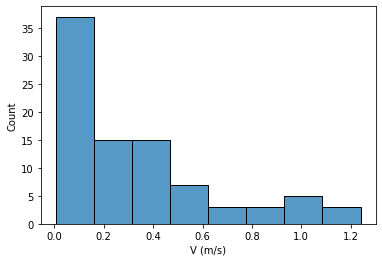

In [245]:
sns.histplot(data=originais, x='V')
plt.xlabel('V (m/s)')

Text(0.5, 0, 'V (m/s)')

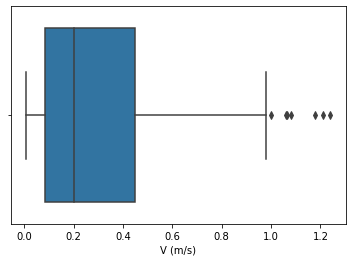

In [246]:
sns.boxplot(data=originais, x='V')
plt.xlabel('V (m/s)')

In [247]:
dados = {}

for col in originais.columns:
    series = originais[col]
    series_normalized = normalize(series)
    dados[f'{col}'] = series_normalized
    
dados_norm = pd.DataFrame(dados).drop(['Re','Cd'],axis=1)

Text(0.5, 0, 'V (m/s)')

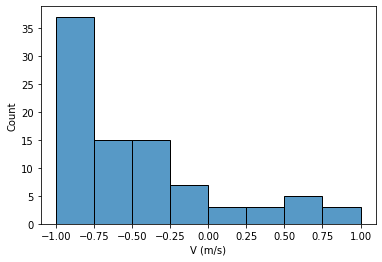

In [248]:
sns.histplot(data=dados_norm, x='V')
plt.xlabel('V (m/s)')

Text(0.5, 0, 'V (m/s)')

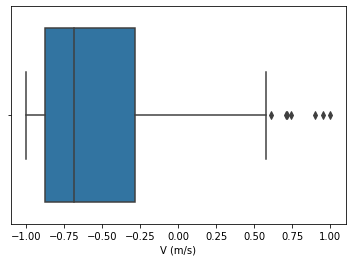

In [249]:
sns.boxplot(data=dados_norm, x='V')
plt.xlabel('V (m/s)')

In [250]:
scal = QuantileTransformer(n_quantiles=100, output_distribution='normal')
dados_quantil = scal.fit(originais).transform(originais)
# dados_quantil = QuantileTransformer(n_quantiles=100).fit(originais).transform(originais)
dados_quantil = pd.DataFrame(dados_quantil, columns=originais.columns).drop(['Re','Cd'],axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (100) is greater than the total number of samples (88). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Text(0.5, 0, 'V (m/s)')

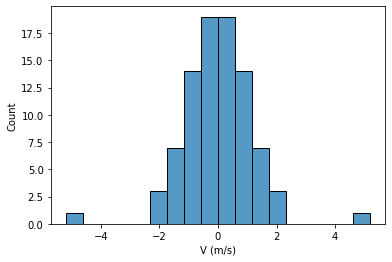

In [251]:
sns.histplot(x='V',data=dados_quantil)
plt.xlabel('V (m/s)')

Text(0.5, 0, 'V (m/s)')

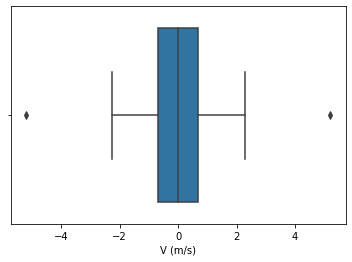

In [252]:
sns.boxplot(x='V',data=dados_quantil)
plt.xlabel('V (m/s)')

In [253]:
X_norm = dados_norm.drop('V',axis=1)
y_norm = dados_norm['V']

x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm,y_norm,train_size=69, shuffle=True)
split_data = {'x_train':x_train_norm, 'y_train':y_train_norm, 'x_test':x_test_norm, 'y_test':y_test_norm}

In [254]:
test_data = pd.concat([x_test_norm,y_test_norm], axis=1)
test_data

,k,n,dp,ps,p,V
87,-0.991497,0.808012,-0.589286,0.302122,-0.919652,-0.552888
27,-0.997071,0.401236,-0.250000,-0.741094,-0.936280,-0.299319
13,-0.998429,0.829107,-0.607143,-0.719875,-0.912216,-0.695328
51,-0.594436,-0.519923,0.642857,0.289858,-0.700369,-0.070733
16,-0.939904,0.064564,-0.250000,-0.741094,-0.912216,-0.868754
70,-0.986420,1.000000,-0.750000,-0.708390,1.000000,-0.974043
67,-1.000000,1.000000,-0.928571,-0.777302,-0.880910,-0.725665
43,1.000000,-0.998082,1.000000,0.277010,-0.912216,-0.330305
8,-0.996524,0.728106,-0.732143,-0.751022,-0.912216,-0.830143
17,-0.939904,0.064564,0.107143,-0.741094,-0.912216,-0.753082


In [255]:
model = BayesianRidge()
model.fit(x_train_norm,y_train_norm)

predict = model.predict(x_test)
y_test = np.array(y_test.tolist())

model_results_norm = {'V real':y_test, 'V predict_bayesian':predict}
model_results_norm = pd.DataFrame(model_results)

model2 = MLPRegressor(shuffle=True, solver='lbfgs', hidden_layer_sizes=12, activation='tanh', max_iter=5000).fit(x_train_norm, y_train_norm)
predict = model2.predict(x_test_norm)

model_results_norm['V predict_mlp'] = predict
model_results_norm = pd.DataFrame(model_results)

Text(-8.075000000000003, 0.5, 'V predito MLP')

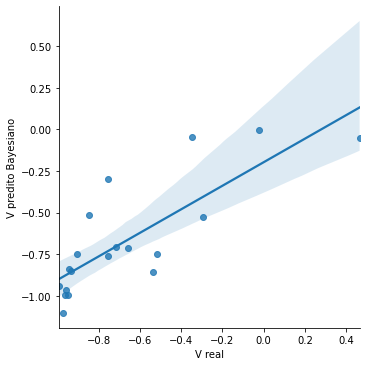

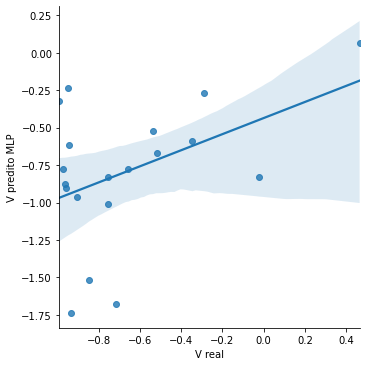

In [256]:
sns.lmplot(x='V real', y='V predict_bayesian', data=model_results_norm)
plt.ylabel('V predito Bayesiano')
sns.lmplot(x='V real', y='V predict_mlp', data=model_results_norm)
plt.ylabel('V predito MLP')

In [257]:
X_quantil = dados_quantil.drop('V',axis=1)
y_quantil = dados_quantil['V']

x_train_quantil, x_test_quantil, y_train_quantil, y_test_quantil = train_test_split(X_quantil,y_quantil,train_size=69, shuffle=True)
split_data = {'x_train':x_train_quantil, 'y_train':y_train_quantil, 'x_test':x_test_quantil, 'y_test':y_test_quantil}

test_data = pd.concat([x_test_quantil,y_test_quantil], axis=1)
test_data

,k,n,dp,ps,p,V
25,-0.446588,-0.277223,0.292225,-0.561125,0.000000,0.494873
62,0.879168,-1.294762,1.116127,0.922396,0.879168,1.401986
84,-0.307293,0.900572,-0.858159,0.101013,-0.665474,-1.038901
36,-0.561125,-0.028816,-0.322431,-1.899709,0.000000,-0.817237
78,-0.159134,0.544341,-0.014406,-0.217798,-0.777639,-0.462562
42,5.199338,-1.576361,1.116127,0.922396,0.000000,0.527709
31,-1.230818,0.247401,0.701873,-0.561125,-1.401986,0.900572
18,0.217798,-0.368308,-0.322431,-0.561125,-1.089662,-0.368308
43,5.199338,-1.576361,5.199338,0.446588,0.000000,0.561125
48,0.629937,-0.612465,5.199338,0.446588,1.014499,0.399323


In [258]:
model = BayesianRidge()
model.fit(x_train_quantil,y_train_quantil)

predict = model.predict(x_test)
y_test = np.array(y_test.tolist())

model_results_quantil = {'V real':y_test, 'V predict_bayesian':predict}
model_results_quantil = pd.DataFrame(model_results)

model2 = MLPRegressor(shuffle=True, solver='lbfgs', hidden_layer_sizes=12, activation='tanh', max_iter=5000).fit(x_train_quantil, y_train_quantil)
predict = model2.predict(x_test_quantil)

model_results_quantil['V predict_mlp'] = predict
model_result_quantil = pd.DataFrame(model_results)

Text(7.924999999999997, 0.5, 'V predito MLP')

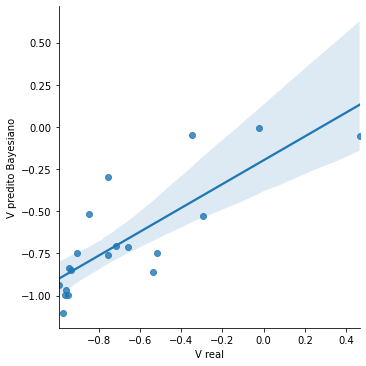

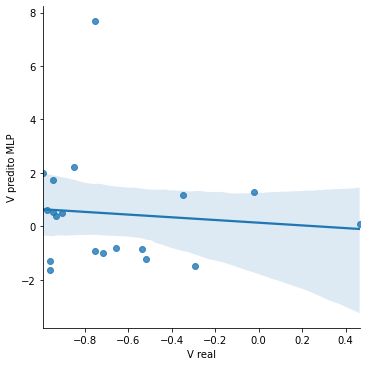

In [259]:
sns.lmplot(x='V real', y='V predict_bayesian', data=model_results_quantil)
plt.ylabel('V predito Bayesiano')
sns.lmplot(x='V real', y='V predict_mlp', data=model_results_quantil)
plt.ylabel('V predito MLP')

In [279]:
pipe = Pipeline([
                 ('model', BayesianRidge())
])

# pipe.get_params()

In [280]:
model_bayes = GridSearchCV(
    estimator = pipe,
    param_grid = {
        'model__n_iter': [100,500,1000],
        'model__alpha_1': [1e-5,1e-6,1e-7],
        'model__alpha_2': [1e-5,1e-6,1e-7],
        'model__lambda_1': [1e-5,1e-6,1e-7],
        'model__lambda_2': [1e-5,1e-6,1e-7]
    },
    cv = 10,
    scoring = {
        'R2': make_scorer(r2_score),
        'RMSE': make_scorer(mean_squared_error),
    },
    refit = 'R2',
    n_jobs = -1
)

model_bayes.fit(X_norm,y_norm)
df_results_bayes_norm = pd.DataFrame(model_bayes.cv_results_)

In [281]:
pipe = Pipeline([
                 ('model', MLPRegressor(max_iter=5000))
])

# pipe.get_params()

In [282]:
model_mlp = GridSearchCV(
    estimator = pipe,
    param_grid = {
        'model__solver': ['adam','lbfgs'],
        'model__activation': ['relu', 'identity', 'logistic', 'tanh'],
        'model__hidden_layer_sizes': [10,11,12,13,14,15]
    },
    cv = 10,
    scoring = {
        'R2': make_scorer(r2_score),
        'RMSE': make_scorer(mean_squared_error),
    },
    refit = 'R2',
    n_jobs = -1
)

model_mlp.fit(X_norm,y_norm)
df_results_mlp_norm = pd.DataFrame(model_mlp.cv_results_)

In [285]:
minvalue_rmse = df_results_mlp_norm['mean_test_RMSE'].min()
df_results_mlp_norm.query('mean_test_RMSE == @minvalue_rmse')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
14,0.180668,0.097031,0.003747,0.003046,identity,11,adam,"{'model__activation': 'identity', 'model__hidd...",-5.056539,-3.593746,-0.391042,0.055663,-1.831248,-2.816327,-2.247342,0.575637,0.815171,0.934596,-1.355518,1.961386,1,0.014696,0.035399,0.025733,0.129866,0.136833,0.208699,0.288206,0.274999,0.007873,0.003833,0.112614,0.106405,48


Os menores valores para RMSE estão ocorrando para os melhores valores de R2 quando (refit = 'RMSE')

In [286]:
maxvalue_r2 = df_results_mlp_norm['mean_test_R2'].max()
df_results_mlp_norm.query('mean_test_R2 == @maxvalue_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
14,0.180668,0.097031,0.003747,0.003046,identity,11,adam,"{'model__activation': 'identity', 'model__hidd...",-5.056539,-3.593746,-0.391042,0.055663,-1.831248,-2.816327,-2.247342,0.575637,0.815171,0.934596,-1.355518,1.961386,1,0.014696,0.035399,0.025733,0.129866,0.136833,0.208699,0.288206,0.274999,0.007873,0.003833,0.112614,0.106405,48


In [287]:
minvalue_rmse = df_results_bayes_norm['mean_test_RMSE'].min()
df_results_bayes_norm.query('mean_test_RMSE == @minvalue_rmse')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
168,0.002936,0.000085,0.001968,0.000173,1e-07,1e-05,1e-05,1e-07,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241
169,0.005453,0.002916,0.002881,0.002217,1e-07,1e-05,1e-05,1e-07,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241
170,0.003723,0.002208,0.002597,0.001811,1e-07,1e-05,1e-05,1e-07,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241


In [289]:
maxvalue_r2 = df_results_bayes_norm['mean_test_R2'].max()
df_results_bayes_norm.query('mean_test_R2 == @maxvalue_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
162,0.003204,0.000300,0.001934,0.000118,1e-07,1e-05,1e-05,1e-05,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154
163,0.007427,0.004368,0.002119,0.000161,1e-07,1e-05,1e-05,1e-05,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154
164,0.003703,0.001566,0.002038,0.000125,1e-07,1e-05,1e-05,1e-05,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154


In [290]:
pipe = Pipeline([
                 ('model', MLPRegressor(max_iter=5000))
])

model_mlp = GridSearchCV(
    estimator = pipe,
    param_grid = {
        'model__solver': ['adam','lbfgs'],
        'model__activation': ['relu', 'identity', 'logistic', 'tanh'],
        'model__hidden_layer_sizes': [10,11,12,13,14,15]
    },
    cv = 10,
    scoring = {
        'R2': make_scorer(r2_score),
        'RMSE': make_scorer(mean_squared_error),
    },
    refit = 'R2',
    n_jobs = -1
)

model_mlp.fit(X_quantil,y_quantil)
df_results_mlp_quantil = pd.DataFrame(model_mlp.cv_results_)

In [291]:
pipe = Pipeline([
                 ('model', BayesianRidge())
])

model_bayes = GridSearchCV(
    estimator = pipe,
    param_grid = {
        'model__n_iter': [100,500,1000],
        'model__alpha_1': [1e-5,1e-6,1e-7],
        'model__alpha_2': [1e-5,1e-6,1e-7],
        'model__lambda_1': [1e-5,1e-6,1e-7],
        'model__lambda_2': [1e-5,1e-6,1e-7]
    },
    cv = 10,
    scoring = {
        'R2': make_scorer(r2_score),
        'RMSE': make_scorer(mean_squared_error),
    },
    refit = 'R2',
    n_jobs = -1
)

model_bayes.fit(X_norm,y_norm)
df_results_bayes_quantil = pd.DataFrame(model_bayes.cv_results_)

In [293]:
minvalue_rmse = df_results_mlp_quantil['mean_test_RMSE'].min()
df_results_mlp_quantil.query('mean_test_RMSE == @minvalue_rmse')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
40,0.36669,0.098918,0.002439,0.000062,tanh,12,adam,"{'model__activation': 'tanh', 'model__hidden_l...",0.575494,0.083618,0.15311,0.850383,-1.157299,-10.470824,-2.191588,0.620171,0.32217,0.974188,-1.024058,3.283532,3,0.111081,0.170393,0.045802,0.133929,0.522155,0.92924,0.328175,2.791655,0.229791,0.021956,0.528418,0.797472,48


In [294]:
maxvalue_r2 = df_results_mlp_quantil['mean_test_R2'].max()
df_results_mlp_quantil.query('mean_test_R2 == @maxvalue_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__activation,param_model__hidden_layer_sizes,param_model__solver,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
36,0.336546,0.066676,0.002436,0.000061,tanh,10,adam,"{'model__activation': 'tanh', 'model__hidden_l...",0.54702,-0.119768,0.555673,0.932604,-1.960958,-8.196026,-1.490719,0.469115,0.723333,0.922513,-0.761721,2.655685,1,0.118532,0.208211,0.02403,0.06033,0.716674,0.744961,0.256108,3.901876,0.093793,0.06591,0.619042,1.122561,44


In [295]:
minvalue_rmse = df_results_bayes_quantil['mean_test_RMSE'].min()
df_results_bayes_quantil.query('mean_test_RMSE == @minvalue_rmse')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
168,0.002861,0.000046,0.001853,0.000013,1e-07,1e-05,1e-05,1e-07,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241
169,0.005042,0.004113,0.002655,0.002169,1e-07,1e-05,1e-05,1e-07,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241
170,0.002855,0.000054,0.001865,0.000021,1e-07,1e-05,1e-05,1e-07,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923122,-5.788248,-0.335461,0.70478,-4.627804,-2.872552,-3.265527,0.578737,-0.433284,-0.271662,-2.023415,2.224638,16,0.011946,0.05231,0.024705,0.040599,0.271989,0.211773,0.378571,0.27299,0.061053,0.07453,0.140047,0.124481,241


In [297]:
maxvalue_r2 = df_results_bayes_quantil['mean_test_R2'].max()
df_results_bayes_quantil.query('mean_test_R2 == @maxvalue_r2')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha_1,param_model__alpha_2,param_model__lambda_1,param_model__lambda_2,param_model__n_iter,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,split4_test_R2,split5_test_R2,split6_test_R2,split7_test_R2,split8_test_R2,split9_test_R2,mean_test_R2,std_test_R2,rank_test_R2,split0_test_RMSE,split1_test_RMSE,split2_test_RMSE,split3_test_RMSE,split4_test_RMSE,split5_test_RMSE,split6_test_RMSE,split7_test_RMSE,split8_test_RMSE,split9_test_RMSE,mean_test_RMSE,std_test_RMSE,rank_test_RMSE
162,0.002922,0.000081,0.001893,0.000122,1e-07,1e-05,1e-05,1e-05,100,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154
163,0.008376,0.004433,0.002001,0.000151,1e-07,1e-05,1e-05,1e-05,500,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154
164,0.002919,0.000044,0.001976,0.000047,1e-07,1e-05,1e-05,1e-05,1000,"{'model__alpha_1': 1e-07, 'model__alpha_2': 1e...",-3.923103,-5.788259,-0.335465,0.704781,-4.627791,-2.872558,-3.265528,0.578737,-0.433289,-0.271669,-2.023415,2.224636,1,0.011946,0.05231,0.024705,0.040599,0.271989,0.211774,0.378571,0.27299,0.061054,0.07453,0.140047,0.124481,154
